In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
earthquake_base = pd.read_csv("earthquake_alert_balanced_dataset.csv")
earthquake_base

,magnitude,depth,cdi,mmi,sig,alert
0,7.00,14.0,8.0,7.0,0.0,green
1,6.90,25.0,4.0,4.0,-33.0,green
2,7.00,579.0,3.0,3.0,-13.0,green
3,7.30,37.0,5.0,5.0,65.0,green
4,6.60,624.0,0.0,2.0,-98.0,green
...,...,...,...,...,...,...
1295,6.87,11.0,9.0,7.0,13.0,yellow
1296,7.85,93.0,8.0,6.0,-51.0,yellow
1297,7.48,142.0,7.0,6.0,120.0,yellow
1298,7.04,51.0,7.0,6.0,-115.0,yellow


In [7]:
earthquake_base.isnull().sum()

magnitude    0
depth        0
cdi          0
mmi          0
sig          0
alert        0
dtype: int64

In [8]:
earthquake_base.describe()

,magnitude,depth,cdi,mmi,sig
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,7.061008,50.321538,6.976154,6.939231,-9.749231
std,0.423738,104.348286,2.244875,1.354774,62.245214
min,6.500000,2.000000,0.000000,1.000000,-128.000000
25%,6.700000,12.000000,6.000000,6.000000,-54.000000
50%,7.000000,19.000000,8.000000,7.000000,-7.000000
75%,7.300000,38.000000,8.000000,8.000000,31.000000
max,8.600000,670.000000,9.000000,9.000000,127.000000


<Axes: xlabel='alert', ylabel='count'>

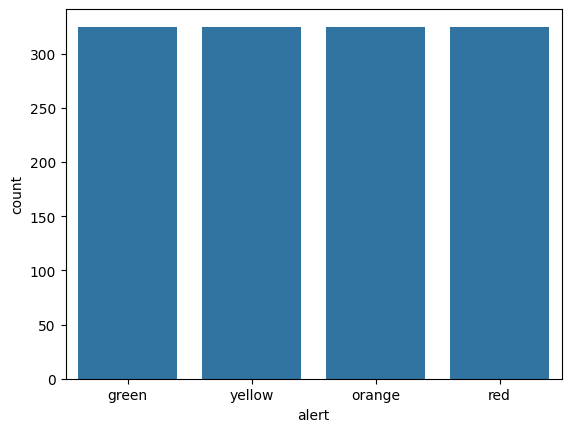

In [9]:
sns.countplot(x=earthquake_base['alert'])

In [10]:
x_earthquake = earthquake_base.iloc[:, 0:5].values
y_earthquake = earthquake_base.iloc[:, 5].values

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_earthquake = scaler.fit_transform(x_earthquake)

In [12]:
from sklearn.model_selection import train_test_split

x_earthquake_train, x_earthquake_test, y_earthquake_train, y_earthquake_test = train_test_split(x_earthquake, y_earthquake, test_size=0.2, random_state=0)
x_earthquake_train.shape, x_earthquake_test.shape

((1040, 5), (260, 5))

In [13]:
y_earthquake_train.shape, y_earthquake_test.shape

((1040,), (260,))

In [14]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0)
svm.fit(x_earthquake_train, y_earthquake_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [15]:
previsoes = svm.predict(x_earthquake_test)
previsoes

array(['yellow', 'red', 'orange', 'orange', 'green', 'yellow', 'green',
       'green', 'red', 'green', 'orange', 'green', 'yellow', 'red',
       'yellow', 'yellow', 'green', 'green', 'red', 'yellow', 'yellow',
       'yellow', 'yellow', 'orange', 'red', 'orange', 'red', 'red',
       'green', 'red', 'red', 'red', 'red', 'orange', 'red', 'red', 'red',
       'red', 'orange', 'orange', 'green', 'green', 'red', 'green', 'red',
       'red', 'yellow', 'red', 'yellow', 'green', 'green', 'red',
       'yellow', 'green', 'red', 'red', 'orange', 'yellow', 'green',
       'orange', 'green', 'orange', 'yellow', 'yellow', 'green', 'orange',
       'green', 'orange', 'yellow', 'red', 'orange', 'yellow', 'yellow',
       'green', 'green', 'red', 'orange', 'red', 'red', 'green', 'yellow',
       'yellow', 'yellow', 'red', 'yellow', 'red', 'orange', 'green',
       'red', 'red', 'orange', 'yellow', 'green', 'orange', 'yellow',
       'red', 'green', 'orange', 'red', 'red', 'orange', 'yellow',
     

In [16]:
y_earthquake_test

array(['orange', 'red', 'red', 'orange', 'green', 'yellow', 'green',
       'green', 'yellow', 'green', 'yellow', 'green', 'green', 'red',
       'yellow', 'green', 'green', 'green', 'red', 'orange', 'yellow',
       'yellow', 'yellow', 'orange', 'red', 'orange', 'red', 'red',
       'yellow', 'orange', 'red', 'orange', 'orange', 'yellow', 'red',
       'red', 'red', 'orange', 'orange', 'orange', 'yellow', 'green',
       'yellow', 'green', 'red', 'red', 'yellow', 'orange', 'yellow',
       'green', 'green', 'red', 'yellow', 'green', 'red', 'red', 'orange',
       'orange', 'yellow', 'yellow', 'green', 'yellow', 'yellow',
       'yellow', 'green', 'orange', 'green', 'green', 'yellow', 'red',
       'orange', 'yellow', 'yellow', 'yellow', 'green', 'red', 'orange',
       'orange', 'red', 'green', 'red', 'orange', 'green', 'orange',
       'yellow', 'red', 'orange', 'green', 'orange', 'red', 'red',
       'yellow', 'green', 'red', 'yellow', 'red', 'green', 'orange',
       'red', 'red', 

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_earthquake_test, previsoes)

0.65

0.65

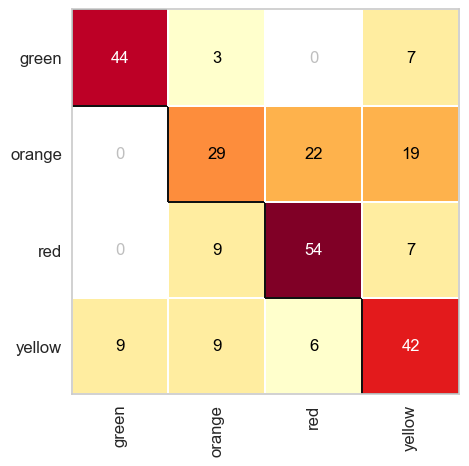

In [18]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(5,5))
cm = ConfusionMatrix(svm)
cm.fit(x_earthquake_train, y_earthquake_train)
cm.score(x_earthquake_test, y_earthquake_test)